In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings
import matplotlib.pylab as plt
warnings.filterwarnings('ignore')
%matplotlib inline
import os

In [48]:
train_data = pd.read_csv('./traindl.csv', index_col=0)
test_data = pd.read_csv('./testdl.csv', index_col=0)

In [49]:
#cdys,canginamt2wk,canginapast2wk,cpvascular,cabg
train_data["cdys"] = np.where(train_data["cdys"]  == 1, 1, 0)
train_data["canginamt2wk"] = np.where(train_data["canginamt2wk"]  == 1, 1, 0)
train_data["canginapast2wk"] = np.where(train_data["canginapast2wk"]  == 1, 1, 0)
train_data["cpvascular"] = np.where(train_data["cpvascular"]  == 1, 1, 0)
train_data["cabg"] = np.where(train_data["cabg"]  == 1, 1, 0)

test_data["cdys"] = np.where(test_data["cdys"]  == 1, 1, 0)
test_data["canginamt2wk"] = np.where(test_data["canginamt2wk"]  == 1, 1, 0)
test_data["canginapast2wk"] = np.where(test_data["canginapast2wk"]  == 1, 1, 0)
test_data["cpvascular"] = np.where(test_data["cpvascular"]  == 1, 1, 0)
test_data["cabg"] = np.where(test_data["cabg"]  == 1, 1, 0)

In [50]:
x_train = train_data.drop(["status"], axis=1).values
y_train = train_data["status"].values

In [51]:
x_test = test_data.drop(["status"], axis=1).values
y_test = test_data["status"].values

In [52]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [53]:
classifier =MLPClassifier(hidden_layer_sizes=(128,32,16,8,2), 
                          max_iter=150,activation = 'relu',solver='adam',
                          learning_rate= 'constant',
                          learning_rate_init= 0.0001,batch_size=32,
                         early_stopping= True)

In [54]:
classifier.fit(x_train, y_train)

MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(128, 32, 16, 8, 2), learning_rate_init=0.0001,
              max_iter=150)

In [55]:
#Predicting y for X_val
y_pred = classifier.predict(x_test)

In [56]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
cm
#array([[  64,  165],
#       [  42, 1020]], dtype=int64)

array([[  50,   97],
       [  56, 1088]], dtype=int64)

In [57]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))
#Accuracy of MLPClassifier :  0.8698683191324554

Accuracy of MLPClassifier :  0.8814872192099148


0.6949207865615796

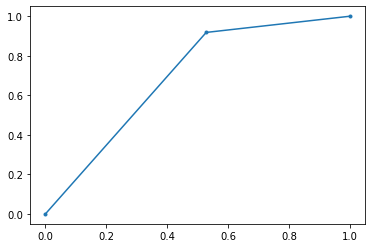

In [58]:
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras
#0.7322665392882733

In [59]:
# testing model
stemi = pd.read_csv('./stemitestingdl.csv', index_col=0)
nstemi = pd.read_csv('./nstemitestingdl.csv', index_col=0)

In [60]:
stemi["cdys"] = np.where(stemi["cdys"]  == 1, 1, 0)
stemi["canginamt2wk"] = np.where(stemi["canginamt2wk"]  == 1, 1, 0)
stemi["canginapast2wk"] = np.where(stemi["canginapast2wk"]  == 1, 1, 0)
stemi["cpvascular"] = np.where(stemi["cpvascular"]  == 1, 1, 0)
stemi["cabg"] = np.where(stemi["cabg"]  == 1, 1, 0)

nstemi["cdys"] = np.where(nstemi["cdys"]  == 1, 1, 0)
nstemi["canginamt2wk"] = np.where(nstemi["canginamt2wk"]  == 1, 1, 0)
nstemi["canginapast2wk"] = np.where(nstemi["canginapast2wk"]  == 1, 1, 0)
nstemi["cpvascular"] = np.where(nstemi["cpvascular"]  == 1, 1, 0)
nstemi["cabg"] = np.where(nstemi["cabg"]  == 1, 1, 0)

In [61]:
#test stemi
x_stemi = stemi.drop(['status'], axis=1).values
y_stemi = stemi['status'].values

In [62]:
predstemi = classifier.predict(x_stemi)
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predstemi, y_stemi)
cm
#array([[ 43,  97],
#       [ 24, 428]], dtype=int64)

array([[ 31,  52],
       [ 36, 473]], dtype=int64)

In [63]:
print("Accuracy of MLPClassifier : ", accuracy(cm))
#Accuracy of MLPClassifier :   0.8344594594594594

Accuracy of MLPClassifier :  0.8513513513513513


0.6513835301914929

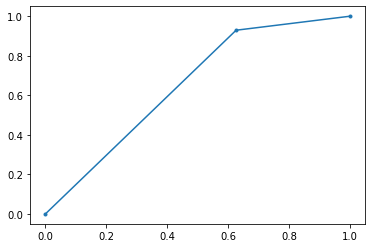

In [64]:
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(predstemi, y_stemi)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras
#0.64538965483524

In [65]:
#test nstemi
x_nstemi = nstemi.drop(['status'], axis=1).values
y_nstemi = nstemi['status'].values

prednstemi = classifier.predict(x_nstemi)

In [66]:
prednstemi = classifier.predict(x_nstemi)
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(prednstemi, y_nstemi)
cm
#array([[ 18,  39],
#       [ 21, 621]], dtype=int64)

array([[ 19,  45],
       [ 20, 615]], dtype=int64)

In [67]:
print("Accuracy of MLPClassifier : ", accuracy(cm))
#Accuracy of MLPClassifier :  0.9141630901287554

Accuracy of MLPClassifier :  0.9070100143061517


0.632689468503937

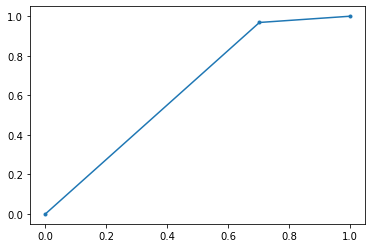

In [68]:
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(prednstemi, y_nstemi)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras
#0.6415395966551893

# using same parameters as R

In [32]:
classifier =MLPClassifier(hidden_layer_sizes=(128,32,16,8,2), 
                          max_iter=150,activation = 'relu',solver='adam',
                          learning_rate_init= 0.0001,batch_size=16,
                         early_stopping= True)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [33]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
cm
#array([[  47,  110],
#       [  59, 1075]], dtype=int64)

array([[  47,  110],
       [  59, 1075]], dtype=int64)

In [34]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))
#Accuracy of MLPClassifier :  0.9178931061192874
#0.8690937257939582

Accuracy of MLPClassifier :  0.8690937257939582


0.6752846110978425

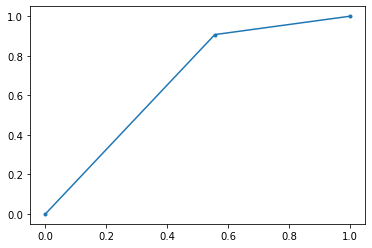

In [35]:
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras
#0.6752846110978425

In [36]:
# testing model
stemi = pd.read_csv('./stemitestingdl.csv', index_col=0)
nstemi = pd.read_csv('./nstemitestingdl.csv', index_col=0)



In [37]:
stemi["cdys"] = np.where(stemi["cdys"]  == 1, 1, 0)
stemi["canginamt2wk"] = np.where(stemi["canginamt2wk"]  == 1, 1, 0)
stemi["canginapast2wk"] = np.where(stemi["canginapast2wk"]  == 1, 1, 0)
stemi["cpvascular"] = np.where(stemi["cpvascular"]  == 1, 1, 0)
stemi["cabg"] = np.where(stemi["cabg"]  == 1, 1, 0)

nstemi["cdys"] = np.where(nstemi["cdys"]  == 1, 1, 0)
nstemi["canginamt2wk"] = np.where(nstemi["canginamt2wk"]  == 1, 1, 0)
nstemi["canginapast2wk"] = np.where(nstemi["canginapast2wk"]  == 1, 1, 0)
nstemi["cpvascular"] = np.where(nstemi["cpvascular"]  == 1, 1, 0)
nstemi["cabg"] = np.where(nstemi["cabg"]  == 1, 1, 0)


In [38]:
#test stemi
x_stemi = stemi.drop(['status'], axis=1).values
y_stemi = stemi['status'].values

#test nstemi
x_nstemi = nstemi.drop(['status'], axis=1).values
y_nstemi = nstemi['status'].values

prednstemi = classifier.predict(x_nstemi)

In [39]:
predstemi = classifier.predict(x_stemi)
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predstemi, y_stemi)
cm
#array([[ 29,  70],
 #      [ 38, 455]], dtype=int64)

array([[ 29,  70],
       [ 38, 455]], dtype=int64)

In [40]:
print("Accuracy of MLPClassifier : ", accuracy(cm))
#Accuracy of MLPClassifier :   0.8175675675675675

Accuracy of MLPClassifier :  0.8175675675675675


0.6079250927121109

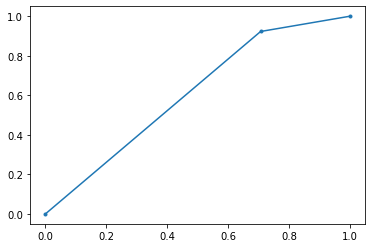

In [41]:
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(predstemi, y_stemi)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras
#0.6079250927121109

In [42]:
#test nstemi
x_nstemi = nstemi.drop(['status'], axis=1).values
y_nstemi = nstemi['status'].values

prednstemi = classifier.predict(x_nstemi)

In [43]:
prednstemi = classifier.predict(x_nstemi)
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(prednstemi, y_nstemi)
cm
#array([[ 18,  40],
#       [ 21, 620]], dtype=int64)


array([[ 18,  40],
       [ 21, 620]], dtype=int64)

In [44]:
print("Accuracy of MLPClassifier : ", accuracy(cm))
#Accuracy of MLPClassifier :  0.9127324749642346

Accuracy of MLPClassifier :  0.9127324749642346


0.6387917585668943

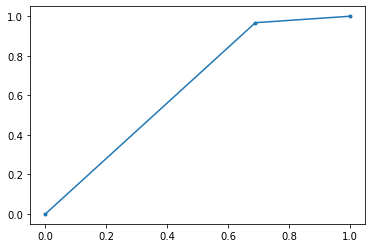

In [45]:
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(prednstemi, y_nstemi)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
auc_keras
#0.6387917585668943